In [7]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

df=pd.read_csv("data.xlsx - Sheet1.csv")

df.head()

Saving data.xlsx - Sheet1.csv to data.xlsx - Sheet1.csv


,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [10]:
print(df.describe())

                 ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338

In [11]:
print("Duplicate Rows: ", df.duplicated().sum())

Duplicate Rows:  0


In [12]:
print(df.isnull().sum())

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [15]:
df.drop_duplicates(inplace=True)


In [19]:
df['DOJ'] = pd.to_datetime(df['DOJ'], format='%d-%m-%Y', errors='coerce')
df['DOB'] = pd.to_datetime(df['DOB'], format='%d-%m-%Y', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   float64       
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [21]:
df.shape

(3998, 39)

In [28]:
df.columns = df.columns.str.lower()

unique_cities = df['jobcity'].unique()
print(unique_cities)

['Bangalore' 'Indore' 'Chennai' 'Gurgaon' 'Manesar' 'Hyderabad' 'Banglore'
 'Noida' 'Kolkata' 'Pune' '-1' 'mohali' 'Jhansi' 'Delhi' 'Hyderabad '
 'Bangalore ' 'noida' 'delhi' 'Bhubaneswar' 'Navi Mumbai' 'Mumbai'
 'New Delhi' 'Mangalore' 'Rewari' 'Gaziabaad' 'Bhiwadi' 'Mysore' 'Rajkot'
 'Greater Noida' 'Jaipur' 'noida ' 'HYDERABAD' 'mysore' 'THANE'
 'Maharajganj' 'Thiruvananthapuram' 'Punchkula' 'Bhubaneshwar' 'Pune '
 'coimbatore' 'Dhanbad' 'Lucknow' 'Trivandrum' 'kolkata' 'mumbai'
 'Gandhi Nagar' 'Una' 'Daman and Diu' 'chennai' 'GURGOAN' 'vsakhapttnam'
 'pune' 'Nagpur' 'Bhagalpur' 'new delhi - jaisalmer' 'Coimbatore'
 'Ahmedabad' 'Kochi/Cochin' 'Bankura' 'Bengaluru' 'Mysore ' 'Kanpur '
 'jaipur' 'Gurgaon ' 'bangalore' 'CHENNAI' 'Vijayawada' 'Kochi' 'Beawar'
 'Alwar' 'NOIDA' 'Greater noida' 'Siliguri ' 'raipur' 'gurgaon' 'Bhopal'
 'Faridabad' 'Jodhpur' 'udaipur' 'Muzaffarpur' 'Kolkata`' 'Bulandshahar'
 'Haridwar' 'Raigarh' 'Visakhapatnam' 'Jabalpur' 'hyderabad' 'Unnao'
 'KOLKATA' 'Than

In [30]:
df.jobcity = df.jobcity.str.strip().str.lower()

df['jobcity'].unique()


array(['bangalore', 'indore', 'chennai', 'gurgaon', 'manesar',
       'hyderabad', 'banglore', 'noida', 'kolkata', 'pune', '-1',
       'mohali', 'jhansi', 'delhi', 'bhubaneswar', 'navi mumbai',
       'mumbai', 'new delhi', 'mangalore', 'rewari', 'gaziabaad',
       'bhiwadi', 'mysore', 'rajkot', 'greater noida', 'jaipur', 'thane',
       'maharajganj', 'thiruvananthapuram', 'punchkula', 'bhubaneshwar',
       'coimbatore', 'dhanbad', 'lucknow', 'trivandrum', 'gandhi nagar',
       'una', 'daman and diu', 'gurgoan', 'vsakhapttnam', 'nagpur',
       'bhagalpur', 'new delhi - jaisalmer', 'ahmedabad', 'kochi/cochin',
       'bankura', 'bengaluru', 'kanpur', 'vijayawada', 'kochi', 'beawar',
       'alwar', 'siliguri', 'raipur', 'bhopal', 'faridabad', 'jodhpur',
       'udaipur', 'muzaffarpur', 'kolkata`', 'bulandshahar', 'haridwar',
       'raigarh', 'visakhapatnam', 'jabalpur', 'unnao', 'aurangabad',
       'belgaum', 'dehradun', 'rudrapur', 'jamshedpur', 'vizag', 'nouda',
       'dharam

In [32]:
city_mapping = {
 'bangalore': 'Bangalore',
 'banglore': 'Bangalore',
 'banagalore': 'Bangalore',

'bengaluru': 'Bangalore',
 'asifabadbanglore':'Bangalore',
 'indore': 'Indore',
 'chennai': 'Chennai',
 'gurgaon': 'Gurgaon',
 'gurgoan': 'Gurgaon',
 'gurga': 'Gurgaon',
 'manesar': 'Manesar',
 'hyderabad': 'Hyderabad',
 'hderabad': 'Hyderabad',
 'hyderabad(bhadurpally)': 'Hyderabad',
 'noida': 'Noida',
 'nouda': 'Noida',
 'kolkata': 'Kolkata',
 'kolkata`': 'Kolkata',
 'pune': 'Pune',
 '-1': 'Unknown',
 'mohali': 'Mohali',
 'jhansi': 'Jhansi',
 'delhi': 'Delhi',
 'new delhi': 'New Delhi',
 'bhubaneswar': 'Bhubaneswar',
 'bhubaneshwar': 'Bhubaneswar',
 'navi mumbai': 'Navi Mumbai',
 'mumbai': 'Mumbai',
 'mangalore': 'Mangalore',
 'rewari': 'Rewari',
 'gaziabaad': 'Ghaziabad',
 'ghaziabad': 'Ghaziabad',
 'bhiwadi': 'Bhiwadi',
 'mysore': 'Mysore',
 'rajkot': 'Rajkot',
 'greater noida': 'Greater Noida',
 'jaipur': 'Jaipur',
 'thane': 'Thane',
 'maharajganj': 'Maharajganj',
 'thiruvananthapuram': 'Thiruvananthapuram',
 'punchkula': 'Panchkula',
 'coimbatore': 'Coimbatore',
 'dhanbad': 'Dhanbad',
 'lucknow': 'Lucknow',
 'trivandrum': 'Thiruvananthapuram',
 'gandhi nagar': 'Gandhinagar',
 'una': 'Una',
 'daman and diu': 'Daman and Diu',
 'vsakhapttnam': 'Visakhapatnam',
 'nagpur': 'Nagpur',

'bhagalpur': 'Bhagalpur',
 'new delhi- jaisalmer': 'New Delhi',
 'ahmedabad': 'Ahmedabad',
 'kochi/cochin': 'Kochi',
 'bankura': 'Bankura',
 'kanpur': 'Kanpur',
 'vijayawada': 'Vijayawada',
 'kochi': 'Kochi',
 'beawar': 'Beawar',
 'alwar': 'Alwar',
 'siliguri': 'Siliguri',
 'raipur': 'Raipur',
 'bhopal': 'Bhopal',
 'faridabad': 'Faridabad',
 'jodhpur': 'Jodhpur',
 'udaipur': 'Udaipur',
 'muzaffarpur': 'Muzaffarpur',
 'bulandshahar': 'Bulandshahar',
 'haridwar': 'Haridwar',
 'raigarh': 'Raigarh',
 'visakhapatnam': 'Visakhapatnam',
 'jabalpur': 'Jabalpur',
 'unnao': 'Unnao',
 'aurangabad': 'Aurangabad',
 'belgaum': 'Belgaum',
 'dehradun': 'Dehradun',
 'rudrapur': 'Rudrapur',
 'jamshedpur': 'Jamshedpur',
 'vizag': 'Visakhapatnam',
 'nouda': 'Noida',
 'dharamshala': 'Dharamshala',
 'hissar': 'Hisar',
 'ranchi': 'Ranchi',
 'madurai': 'Madurai',
 'chandigarh': 'Chandigarh',
 'australia': 'Australia',
 'cheyyar': 'Cheyyar',
 'sonepat': 'Sonepat',
 'pantnagar': 'Pantnagar',
 'jagdalpur': 'Jagdalpur',
 'angul': 'Angul',
 'baroda': 'Vadodara',
 'ariyalur': 'Ariyalur',
 'jowai': 'Jowai',
 'neemrana': 'Neemrana',
 'tirupathi': 'Tirupati',
 'bhubneshwar': 'Bhubaneswar',

'calicut': 'Kozhikode',
 'gandhinagar': 'Gandhinagar',
 'dubai': 'Dubai',
 'ahmednagar': 'Ahmednagar',
 'nashik': 'Nashik',
 'bellary': 'Bellary',
 'ludhiana': 'Ludhiana',
 'muzaffarnagar': 'Muzaffarnagar',
 'gagret': 'Gagret',
 'indirapuram, ghaziabad': 'Ghaziabad',
 'gwalior': 'Gwalior',
 'chennai & mumbai': 'Chennai',
 'rajasthan': 'Rajasthan',
 'sonipat': 'Sonipat',
 'bareli': 'Bareli',
 'hospete': 'Hospete',
 'miryalaguda': 'Miryalaguda',
 'dharuhera': 'Dharuhera',
 'meerut': 'Meerut',
 'ganjam': 'Ganjam',
 'hubli': 'Hubli',
 'ncr': 'NCR',
 'agra': 'Agra',
 'trichy': 'Tiruchirappalli',
 'kudankulam ,tarapur': 'Kudankulam',
 'ongole': 'Ongole',
 'sambalpur': 'Sambalpur',
 'pondicherry': 'Puducherry',
 'bundi': 'Bundi',
 'sadulpur,rajgarh,distt-churu,rajasthan': 'Rajasthan',
 'am': 'Am',
 'bikaner': 'Bikaner',
 'vadodara': 'Vadodara',
 'india': 'India',
 'asansol': 'Asansol',
 'tirunelvelli': 'Tirunelveli',
 'ernakulam': 'Ernakulam',
 'bilaspur': 'Bilaspur',
 'chandrapur': 'Chandrapur',
 'nanded': 'Nanded',
 'dharmapuri': 'Dharmapuri',
 'vandavasi': 'Vandavasi',
 'rohtak': 'Rohtak',
 'patna': 'Patna',
 'salem': 'Salem',
 'nasikcity': 'Nashik',
 'technopark, trivandrum': 'Trivandrum',

'bharuch': 'Bharuch',
 'tornagallu': 'Tornagallu',
 'jaspur': 'Jaspur',
 'burdwan': 'Burdwan',
 'shimla': 'Shimla',
 'gajiabaad': 'Ghaziabad',
 'jammu': 'Jammu',
 'shahdol': 'Shahdol',
 'muvattupuzha': 'Muvattupuzha',
 'al jubail,saudi arabia': 'Al Jubail',
 'kalmar, sweden': 'Kalmar',
 'secunderabad': 'Secunderabad',
 'a-64,sec-64,noida': 'Noida',
 'ratnagiri': 'Ratnagiri',
 'jhajjar': 'Jhajjar',
 'gulbarga': 'Gulbarga',
 'hyderabad(bhadurpally)': 'Hyderabad',
 'nalagarh': 'Nalagarh',
 'jeddah saudi arabia': 'Jeddah',
 'chennai, bangalore': 'Chennai',
 'jamnagar': 'Jamnagar',
 'tirupati': 'Tirupati',
 'gonda': 'Gonda',
 'orissa': 'Odisha',
 'kharagpur': 'Kharagpur',
 'navi mumbai , hyderabad': 'Navi Mumbai',
 'joshimath': 'Joshimath',
 'bathinda': 'Bathinda',
 'johannesburg': 'Johannesburg',
 'kala amb': 'Kala Amb',
 'karnal': 'Karnal',
 'london': 'London',
 'kota': 'Kota',
 'dehraj': 'Dehradun',
 'melbourne': 'Melbourne',
 'moradabad': 'Moradabad',
 'delhi-gurgaon': 'Delhi',
 'ambala': 'Ambala',
 'faridkot': 'Faridkot',
 'rohtak, haryana': 'Rohtak',
 'khammam': 'Khammam',
 'khurda': 'Khurda',
 'jhalawar': 'Jhalawar',
 'kaithal': 'Kaithal',
 'sonbhadra': 'Sonbhadra',
 'fatehgarh sahib': 'Fatehgarh Sahib',
 'kaithal-haryana': 'Kaithal',

'bhilwara': 'Bhilwara',
 'coimbatore, tirupur': 'Coimbatore',
 'sri ganganagar': 'Sri Ganganagar',
 'manipal': 'Manipal',
 'tirupathi': 'Tirupati',
 'kharagpur, west bengal': 'Kharagpur',
 'kolkata': 'Kolkata',
 'trichy-tiruchirappalli': 'Tiruchirappalli',
 }


In [34]:
df['jobcity'] = df['jobcity'].replace(city_mapping)
# df['jobcity'] = df.jobcity.str.strip().str.lower()
print(df['jobcity'])

0       Bangalore
1          Indore
2         Chennai
3         Gurgaon
4         Manesar
          ...    
3993    New Delhi
3994    Hyderabad
3995    Bangalore
3996    Bangalore
3997      Chennai
Name: jobcity, Length: 3998, dtype: object


In [35]:
df['dol'] = df['dol'].apply(lambda x: "Left" if x != "present" else x)
print(df['dol'])

0       present
1       present
2       present
3       present
4          Left
         ...   
3993       Left
3994       Left
3995    present
3996       Left
3997    present
Name: dol, Length: 3998, dtype: object


In [36]:
df['dol'].value_counts()

,count
dol,
Left,2123
present,1875


In [37]:
df.salary.max()

4000000.0

In [39]:
df.salary.mean().round(1)

307699.8

In [40]:
df.salary.min()

35000.0

In [41]:
df.gender.value_counts()

,count
gender,
m,3041
f,957


In [42]:
df.telecomengg = df.telecomengg.replace(-1,0)
df.civilengg = df.civilengg.replace(-1,0)
df.computerscience = df.computerscience.replace(-1,0)
df.mechanicalengg = df.mechanicalengg.replace(-1,0)
df.electricalengg = df.electricalengg.replace(-1,0)

df.tail()

,unnamed: 0,id,salary,doj,dol,designation,jobcity,gender,dob,10percentage,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3993,train,47916,280000.0,2011-10-01,Left,software engineer,New Delhi,m,1987-04-15,52.09,...,0,0,0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000.0,2013-07-01,Left,technical writer,Hyderabad,f,1992-08-27,90.00,...,0,0,0,0,0,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000.0,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,...,0,0,0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000.0,2014-07-01,Left,software developer,Bangalore,f,1992-03-20,78.72,...,438,0,0,0,0,-0.1590,0.0459,-0.4511,-0.36120,-0.0943
3997,train,324966,400000.0,2013-02-01,present,senior systems engineer,Chennai,f,1991-02-26,70.60,...,0,0,0,0,0,-1.1128,-0.2793,-0.6343,1.32553,-0.6035


In [43]:
df['salary'].describe()

,salary
count,3.998000e+03
mean,3.076998e+05
std,2.127375e+05
min,3.500000e+04
25%,1.800000e+05
50%,3.000000e+05
75%,3.700000e+05
max,4.000000e+06


In [46]:
pd.options.display.float_format = '{:,.0f}'.format
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
id,"3,998","663,795","11,244","334,284","639,600","990,480","1,298,275","363,218"
salary,"3,998","307,700","35,000","180,000","300,000","370,000","4,000,000","212,737"
doj,3998,2013-07-02 11:04:10.325162496,1991-06-01 00:00:00,2012-10-01 00:00:00,2013-11-01 00:00:00,2014-07-01 00:00:00,2015-12-01 00:00:00,NaN
dob,3998,1990-12-06 06:01:15.637819008,1977-10-30 00:00:00,1989-11-16 06:00:00,1991-03-07 12:00:00,1992-03-13 18:00:00,1997-05-27 00:00:00,NaN
10percentage,"3,998",78,43,72,79,86,98,10
12graduation,"3,998","2,008","1,995","2,007","2,008","2,009","2,013",2
12percentage,"3,998",74,40,66,74,83,99,11
collegeid,"3,998","5,157",2,494,"3,879","8,818","18,409","4,802"
collegetier,"3,998",2,1,2,2,2,2,0
collegegpa,"3,998",71,6,66,72,76,100,8


In [47]:
df.columns

Index(['unnamed: 0', 'id', 'salary', 'doj', 'dol', 'designation', 'jobcity',
       'gender', 'dob', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'collegeid', 'collegetier', 'degree',
       'specialization', 'collegegpa', 'collegecityid', 'collegecitytier',
       'collegestate', 'graduationyear', 'english', 'logical', 'quant',
       'domain', 'computerprogramming', 'electronicsandsemicon',
       'computerscience', 'mechanicalengg', 'electricalengg', 'telecomengg',
       'civilengg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

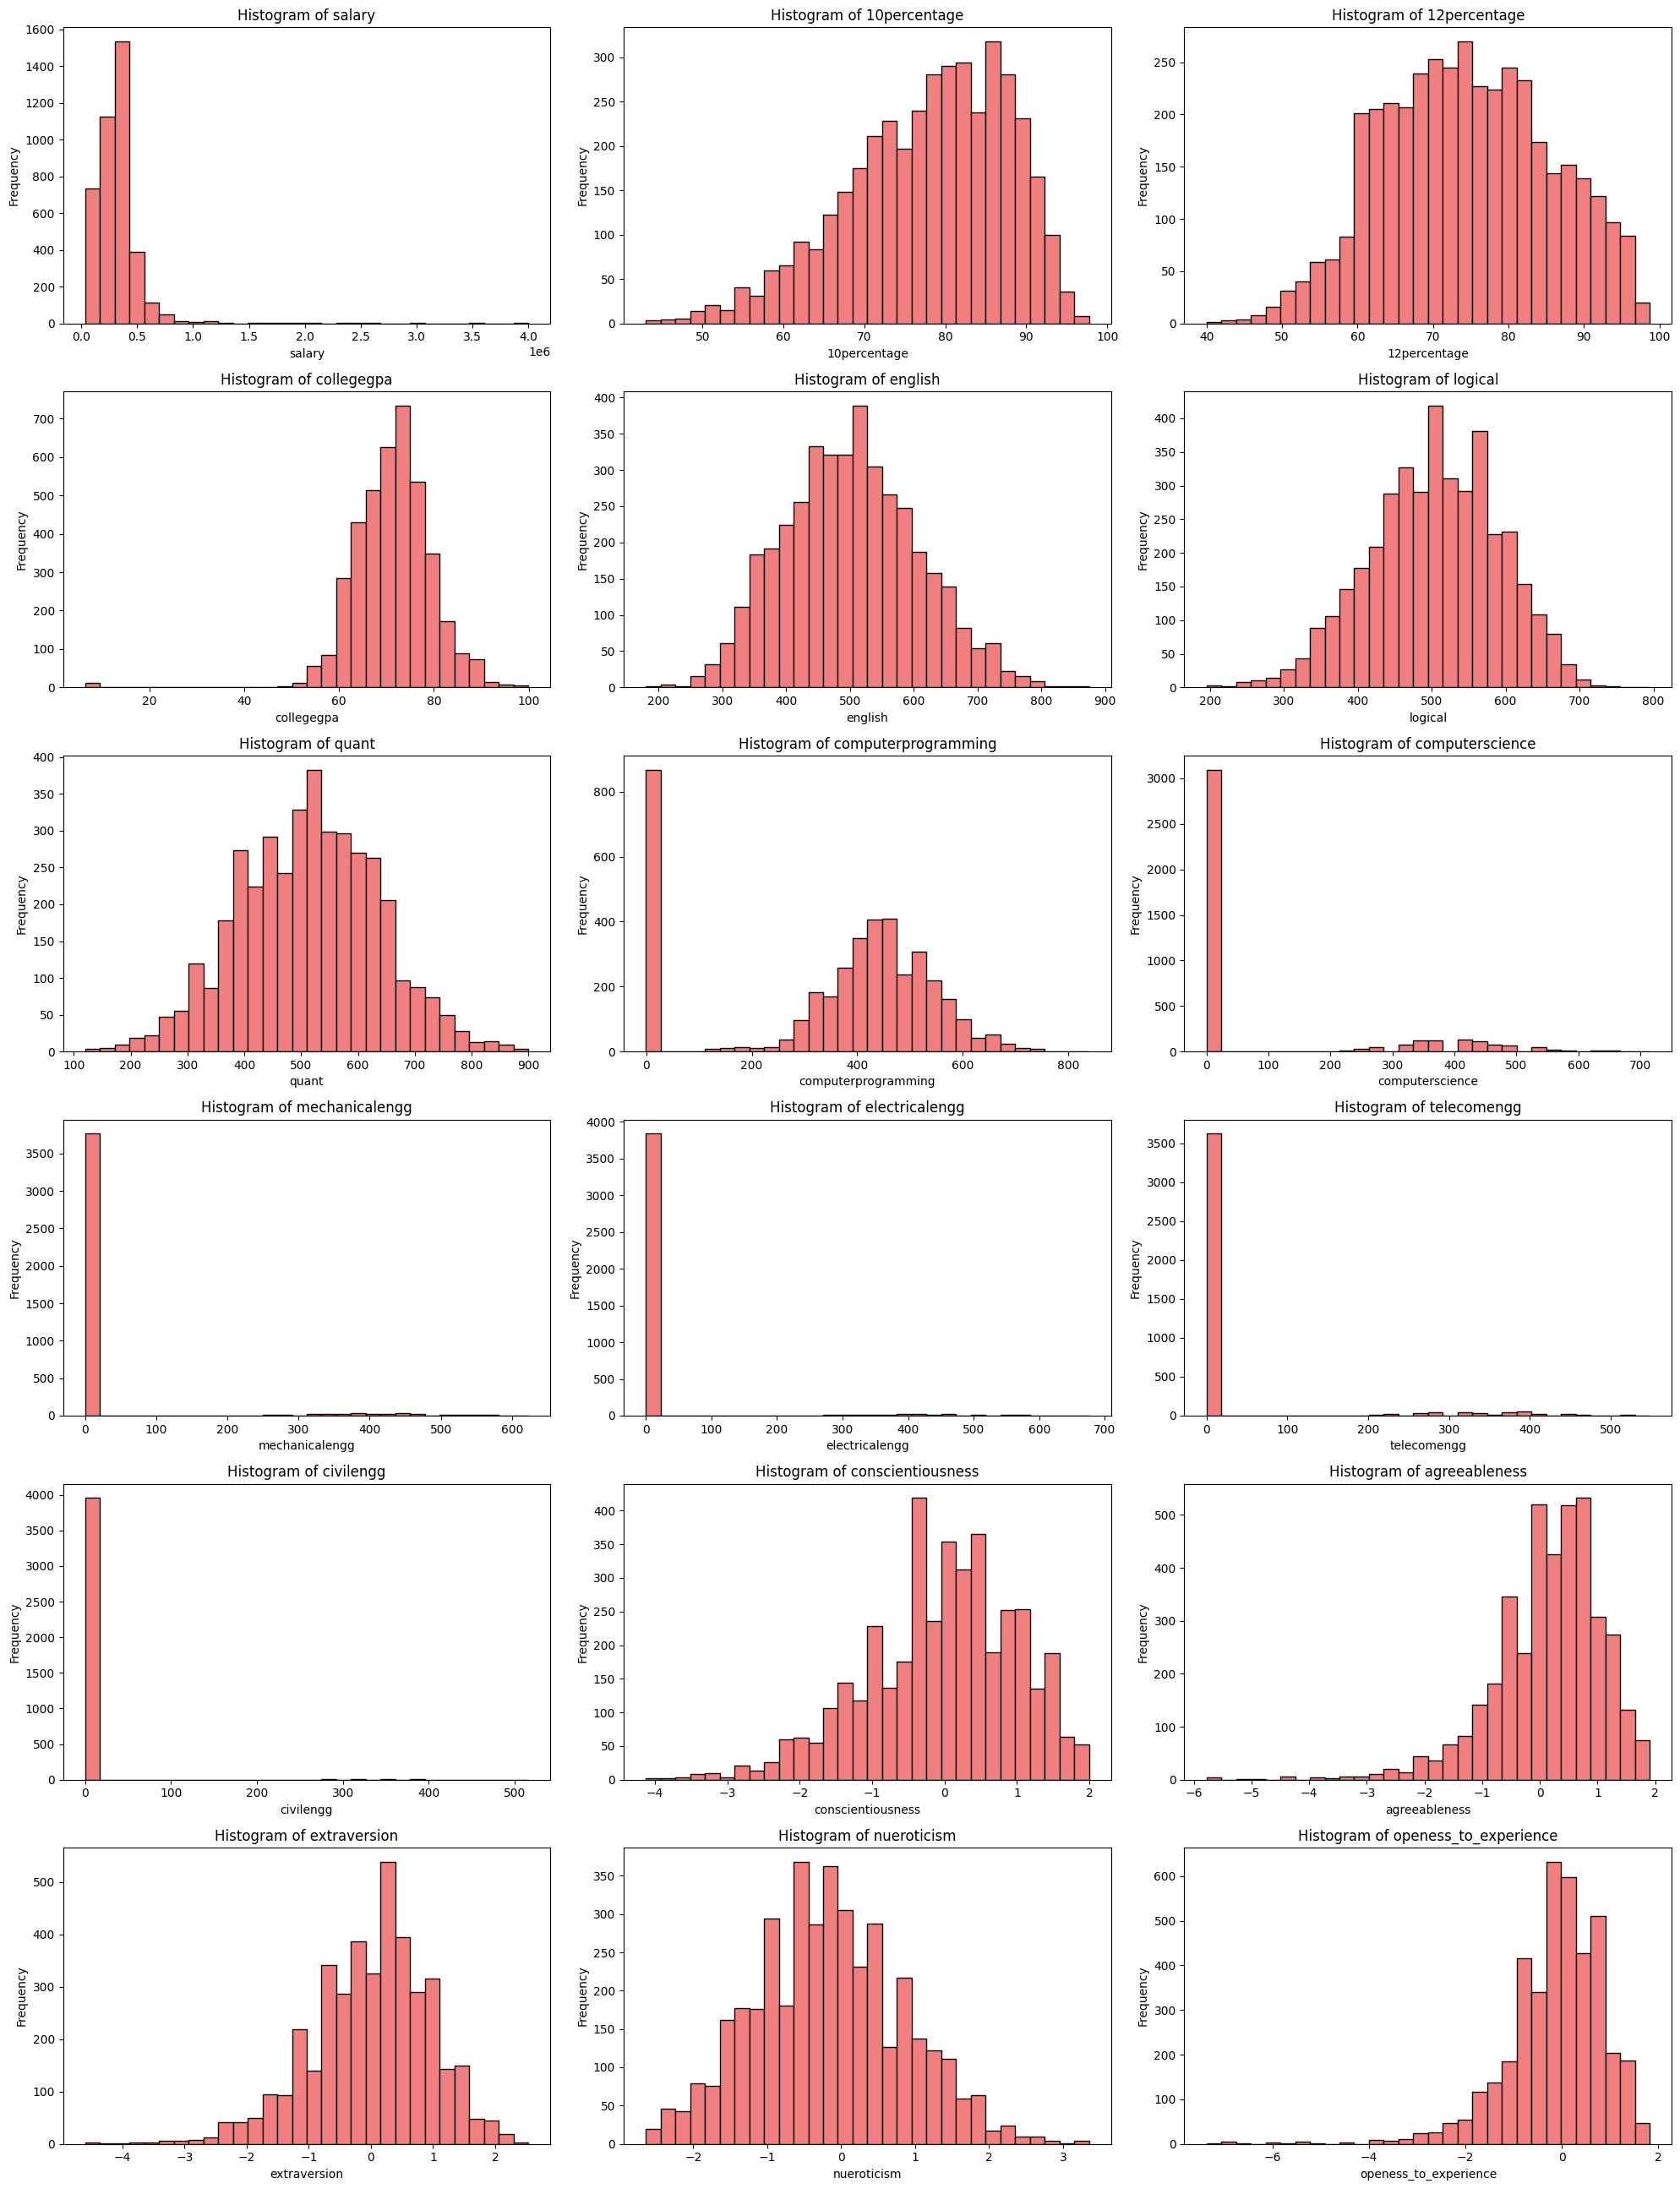

In [57]:
columns_to_plot = ['salary', '10percentage', '12percentage', 'collegegpa',
 'english', 'logical','quant', 'computerprogramming', 'computerscience','mechanicalengg',
 'electricalengg', 'telecomengg', 'civilengg','conscientiousness',
 'agreeableness', 'extraversion', 'nueroticism',
 'openess_to_experience']

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 26))
axes = axes.flatten()
for i, column in enumerate(columns_to_plot):
  axes[i].hist(df[column].dropna(), bins=30, color='lightcoral',edgecolor='black')
  axes[i].set_title(f'Histogram of {column}')
  axes[i].set_xlabel(column)
  axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])
plt.tight_layout()
20

plt.show()

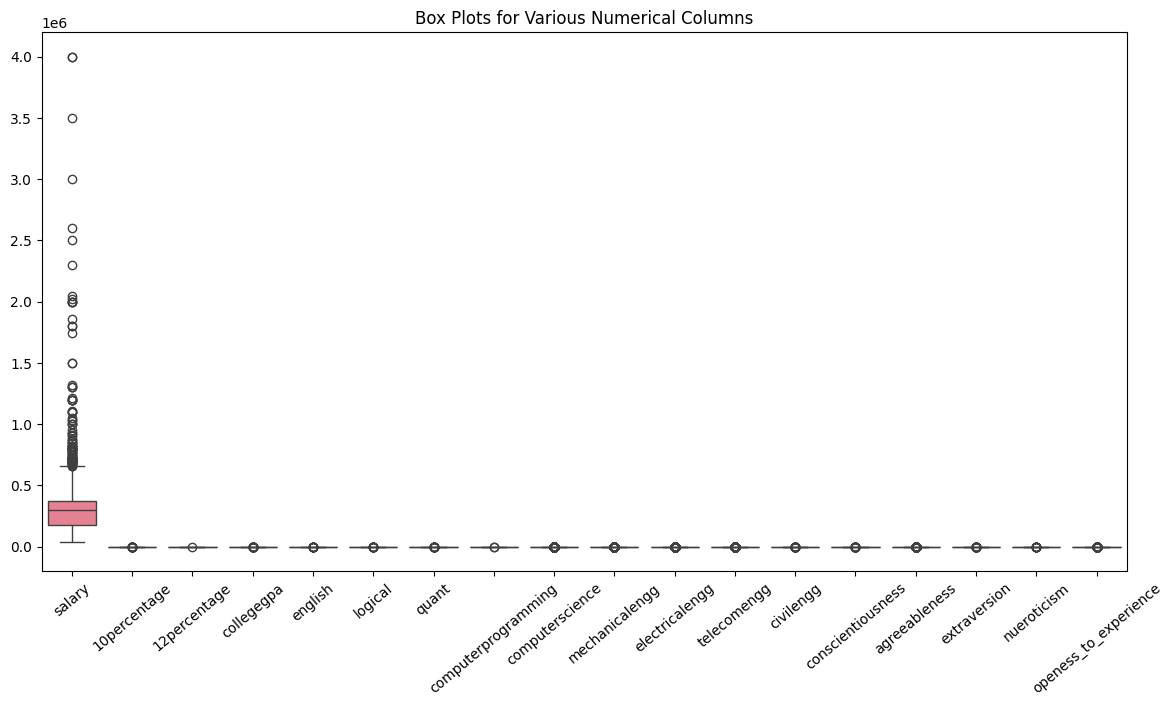

In [63]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

columns_to_plots = ['salary', '10percentage', '12percentage', 'collegegpa',
                    'english', 'logical', 'quant', 'computerprogramming',
                    'computerscience', 'mechanicalengg', 'electricalengg',
                    'telecomengg', 'civilengg', 'conscientiousness',
                    'agreeableness', 'extraversion', 'nueroticism',
                    'openess_to_experience']

 # Plot the box plot with valid columns
plt.figure(figsize=(14, 7))
sns.boxplot(data=df[columns_to_plots])
plt.title('Box Plots for Various Numerical Columns')
plt.xticks(rotation=40)
plt.show()

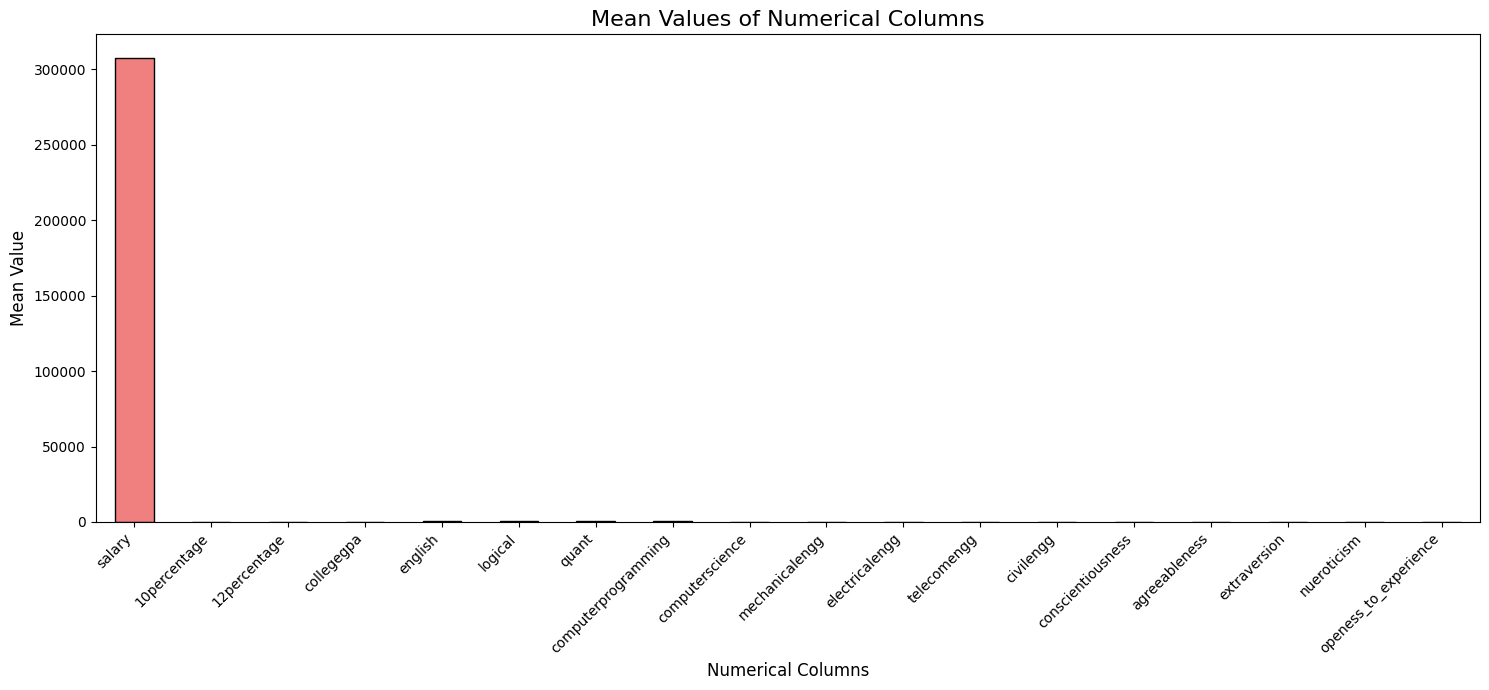

In [64]:
import matplotlib.pyplot as plt
 # Select only numerical columns
columns_to_plots = ['salary', '10percentage', '12percentage', 'collegegpa',
'english', 'logical',
 'quant', 'computerprogramming', 'computerscience',
 'mechanicalengg',

'electricalengg', 'telecomengg', 'civilengg',
 'conscientiousness',
 'agreeableness', 'extraversion', 'nueroticism',
 'openess_to_experience']
 # Calculate the mean of each numerical column
mean_values = df[columns_to_plot].mean()
 # Create the bar plot
plt.figure(figsize=(15, 7)) # Set the figure size
mean_values.plot(kind='bar', color='lightcoral', edgecolor='black')
 # Customize the plot
plt.title('Mean Values of Numerical Columns', fontsize=16)
plt.xlabel('Numerical Columns', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x labels for better visibility
 # Show the plot
plt.tight_layout()
plt.show()

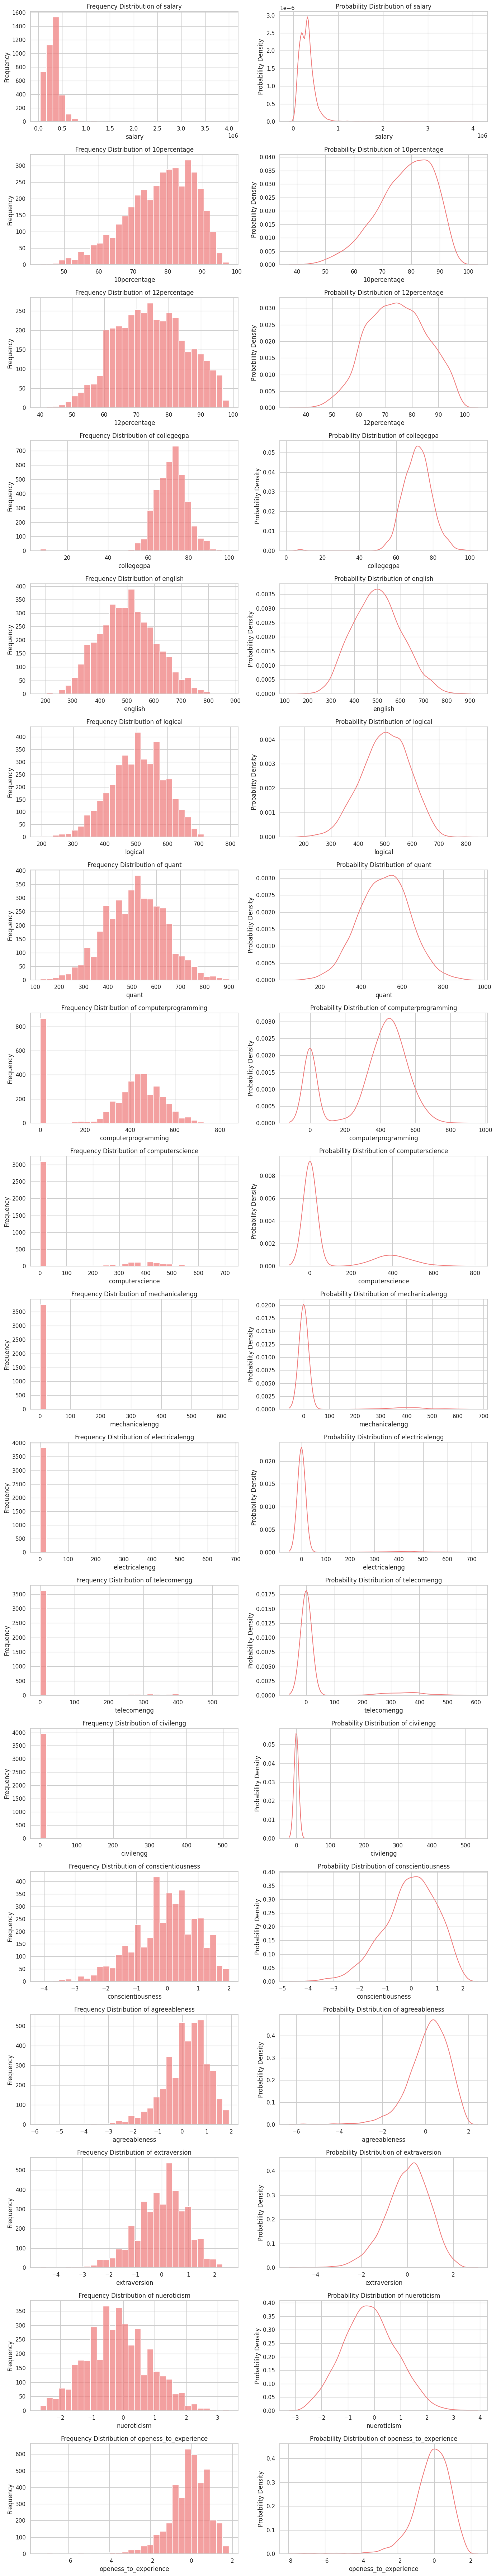

In [66]:
# Set the style of seaborn
sns.set(style="whitegrid")
 # Define the columns for plotting
columns_to_plot = ['salary', '10percentage', '12percentage', 'collegegpa','english', 'logical','quant', 'computerprogramming', 'computerscience',
'mechanicalengg','electricalengg', 'telecomengg', 'civilengg','conscientiousness','agreeableness', 'extraversion', 'nueroticism',
'openess_to_experience']
 # Create a figure with subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=2, figsize=(14,len(columns_to_plot) * 4))
 # Loop through each numerical column to plot
for i, column in enumerate(columns_to_plot):
 # Frequency Distribution
  sns.histplot(df[column], ax=axes[i, 0], bins=30, kde=False, color='lightcoral')
  axes[i, 0].set_title(f'Frequency Distribution of {column}', fontsize=12)
  axes[i, 0].set_xlabel(column)
  axes[i, 0].set_ylabel('Frequency')
 # Probability Distribution (KDE)
  sns.kdeplot(df[column], ax=axes[i, 1], color='lightcoral')
  axes[i, 1].set_title(f'Probability Distribution of {column}', fontsize=12)
  axes[i, 1].set_xlabel(column)
  axes[i, 1].set_ylabel('Probability Density')
 # Adjust layout
plt.tight_layout()
plt.show()

<Axes: xlabel='gender', ylabel='count'>

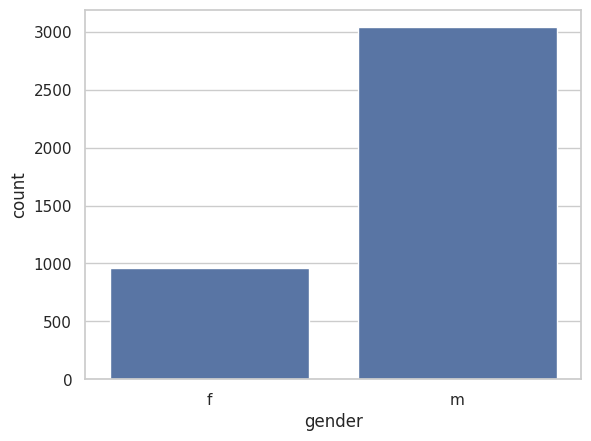

In [67]:
sns.countplot(x=df['gender'])

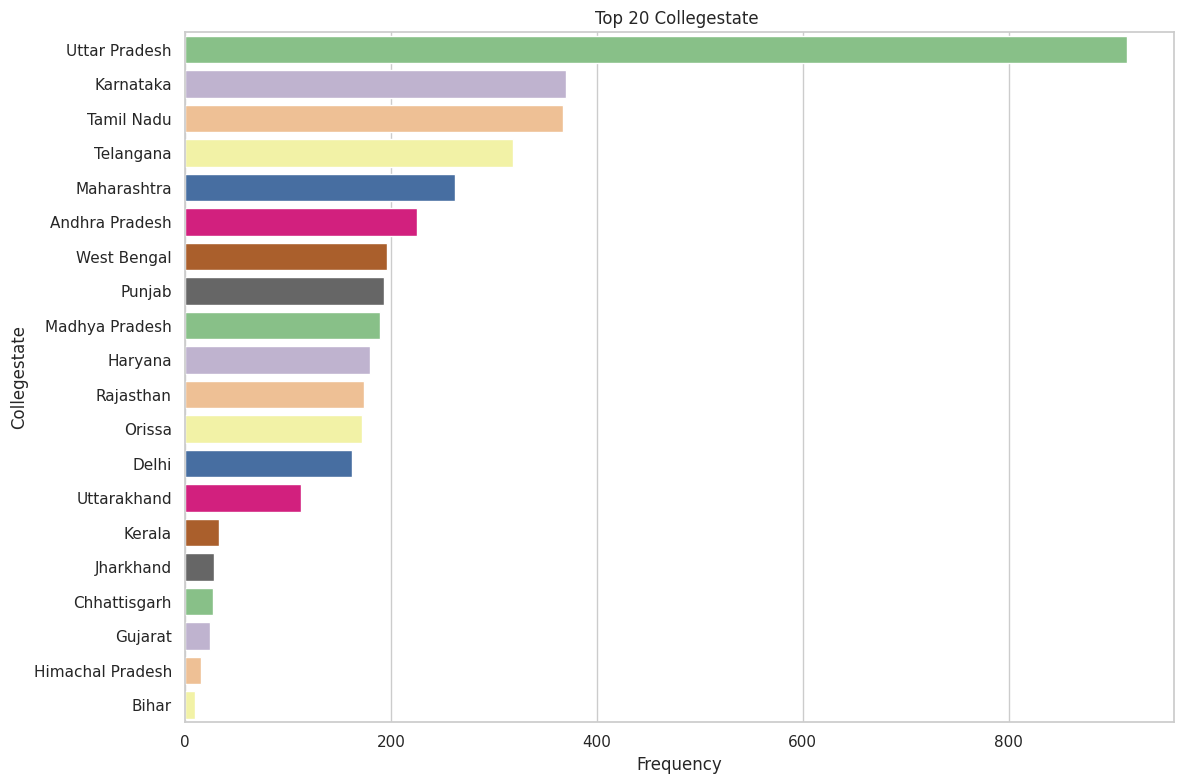

In [72]:
top_collegestates = df['collegestate'].value_counts().nlargest(20)
plt.figure(figsize=(12, 8))
sns.countplot(y='collegestate', data=df[df['collegestate'].isin(top_collegestates.index)],
palette='Accent', order=top_collegestates.index)
plt.title('Top 20 Collegestate ')
plt.xlabel('Frequency')
plt.ylabel('Collegestate')
plt.tight_layout()
plt.show()

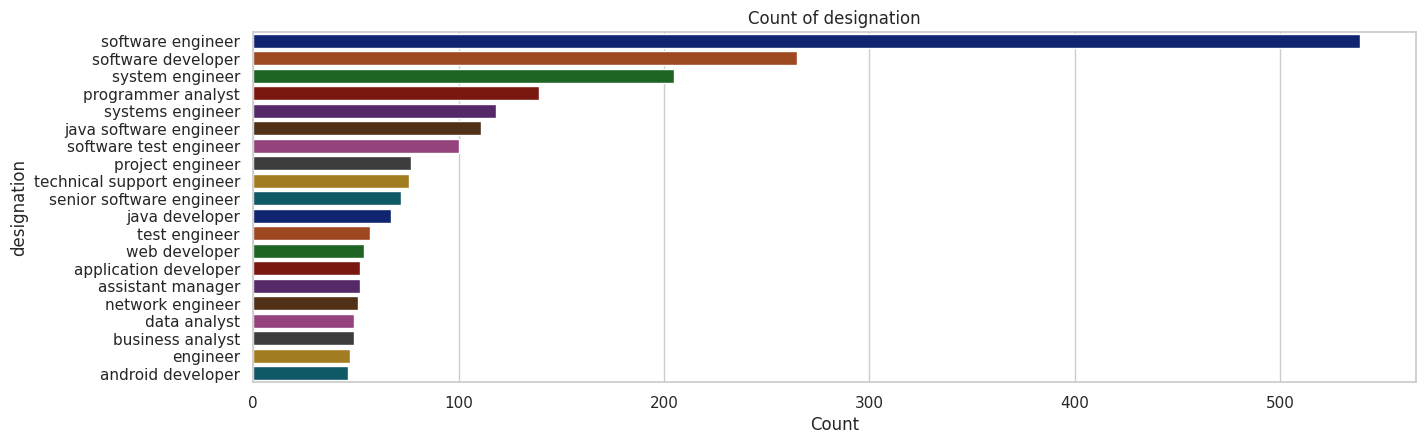

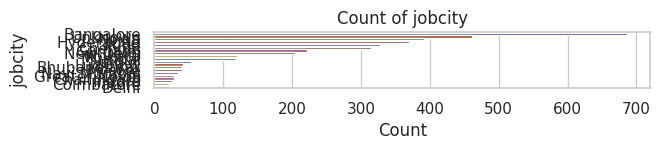

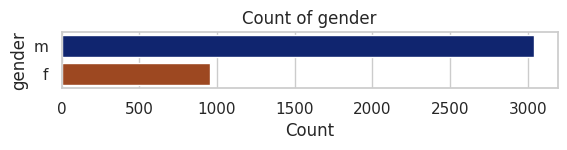

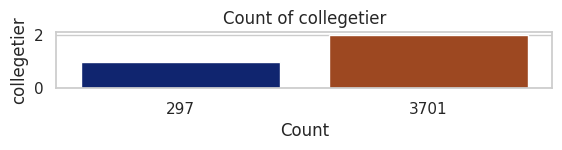

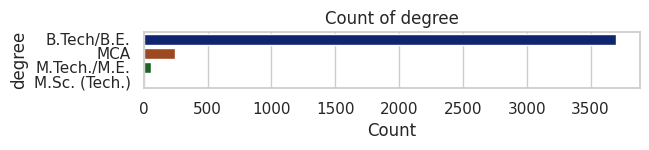

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
 # Set the aesthetics for the plots
sns.set(style="whitegrid")
 # List of important categorical columns
important_categorical_columns = ['designation', 'jobcity', 'gender','collegetier', 'degree']
 # Create a bar plot for each important categorical column
plt.figure(figsize=(15, 30)) # Adjust the figure size as needed
for i, column in enumerate(important_categorical_columns):
 plt.subplot(len(important_categorical_columns), 1, i + 1) # Create a subplot for each column
 top_values = df[column].value_counts().nlargest(20) # Get top 20 values
 sns.barplot(x=top_values.values, y=top_values.index, palette='dark') #Horizontal bar plot
 plt.title(f'Count of {column}') # Set the title
 plt.xlabel('Count') # Label for x-axis
 plt.ylabel(column) # Label for y-axis
 plt.subplots_adjust(hspace=0.4) # Adjust layout to prevent clipping of tick-labels
 plt.show()

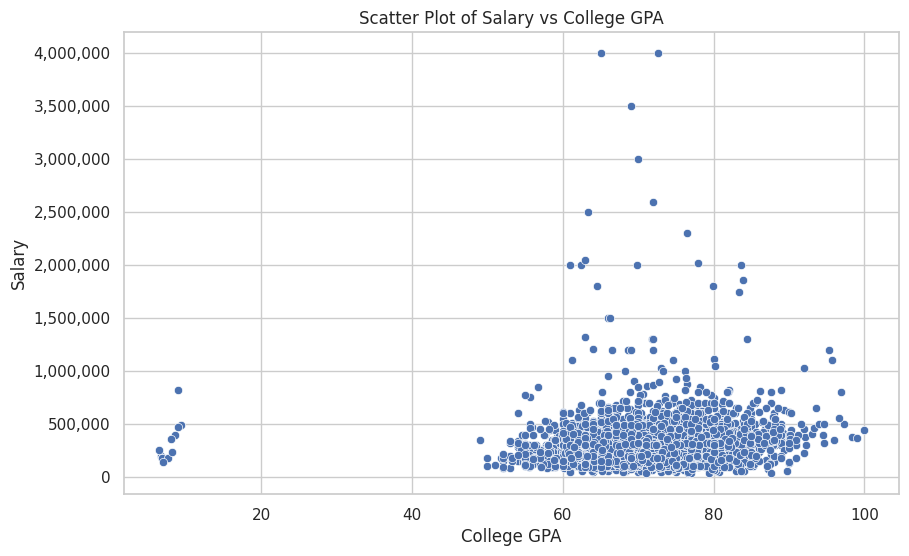

In [78]:
from matplotlib.ticker import FuncFormatter
 # Function to format y-axis labels
def currency(x, _):
  return f'{int(x):,}' # Format as integer with commas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='collegegpa', y='salary')
plt.title('Scatter Plot of Salary vs College GPA')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.grid(True)
# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()

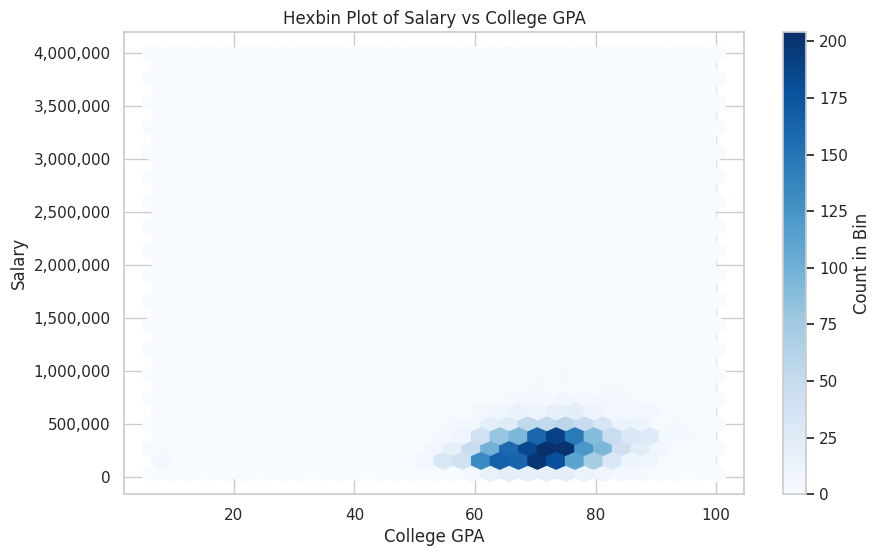

In [79]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['collegegpa'], df['salary'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.title('Hexbin Plot of Salary vs College GPA')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()

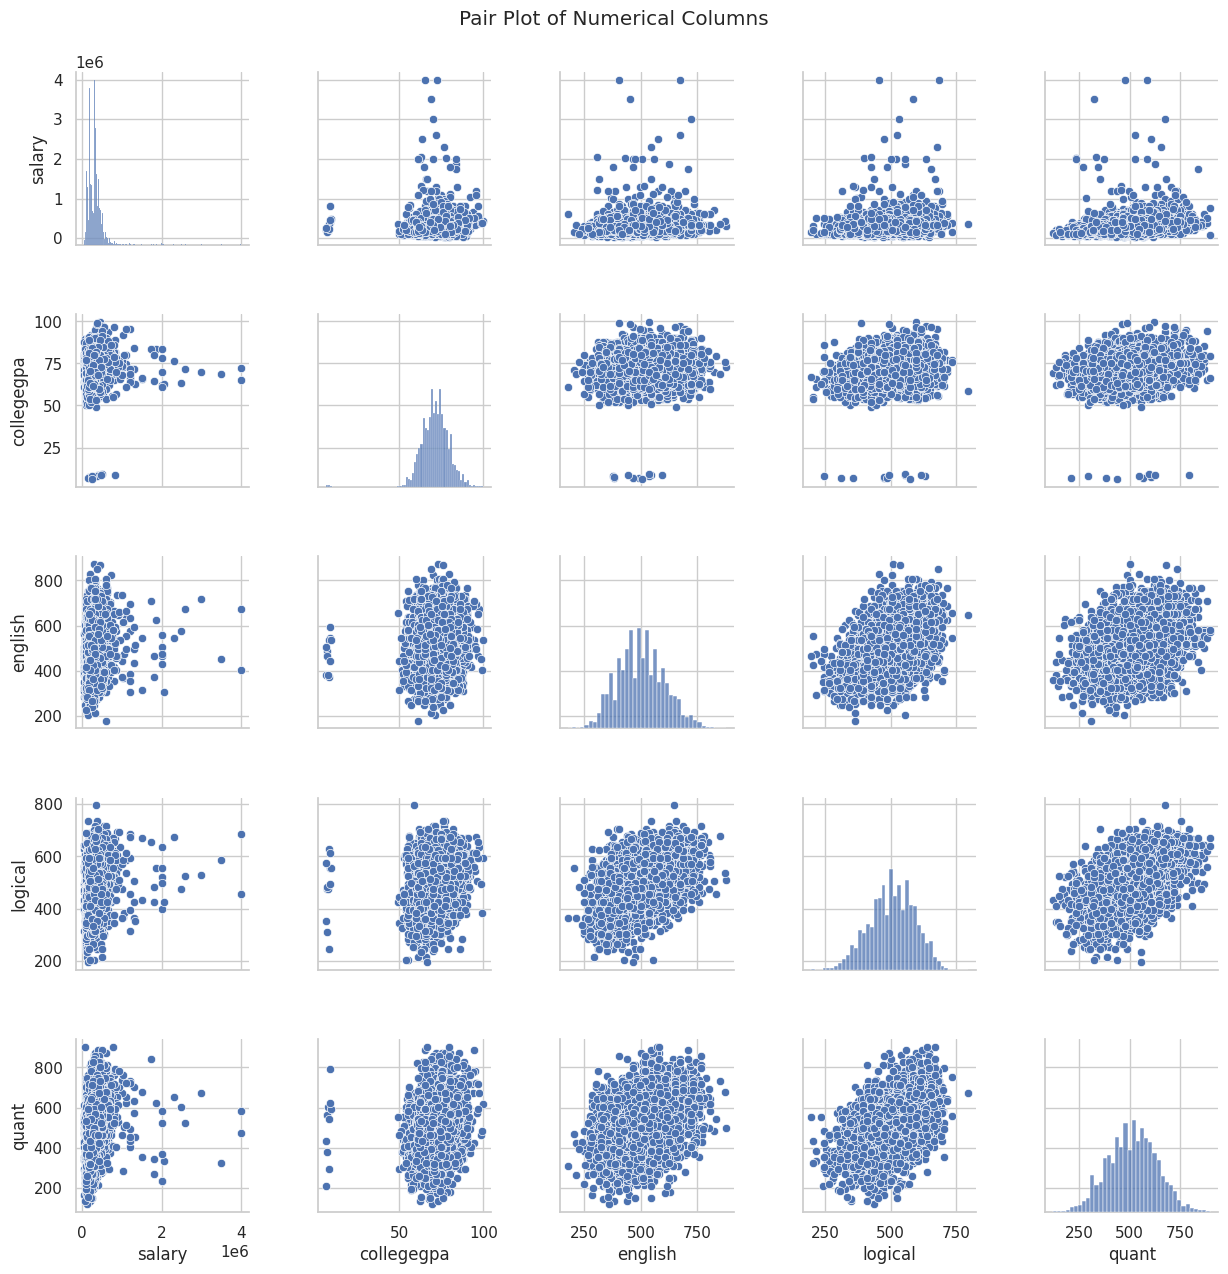

In [80]:
numerical_columns = ['salary', 'collegegpa', 'english', 'logical', 'quant']
sns.set(style="whitegrid")
pair_plot = sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()

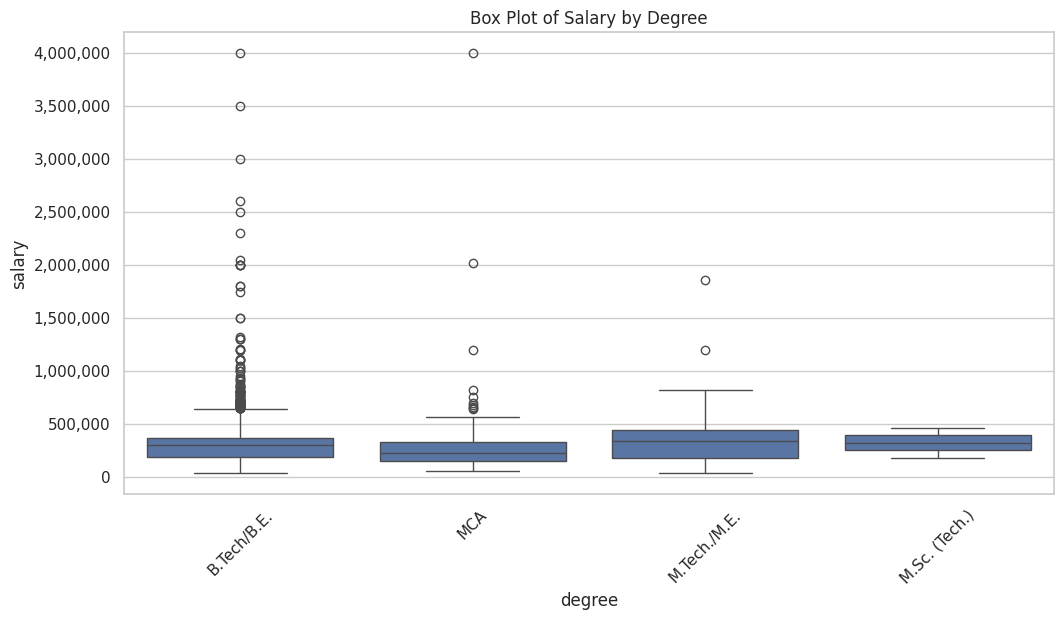

In [81]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='degree', y='salary')
plt.title('Box Plot of Salary by Degree')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()

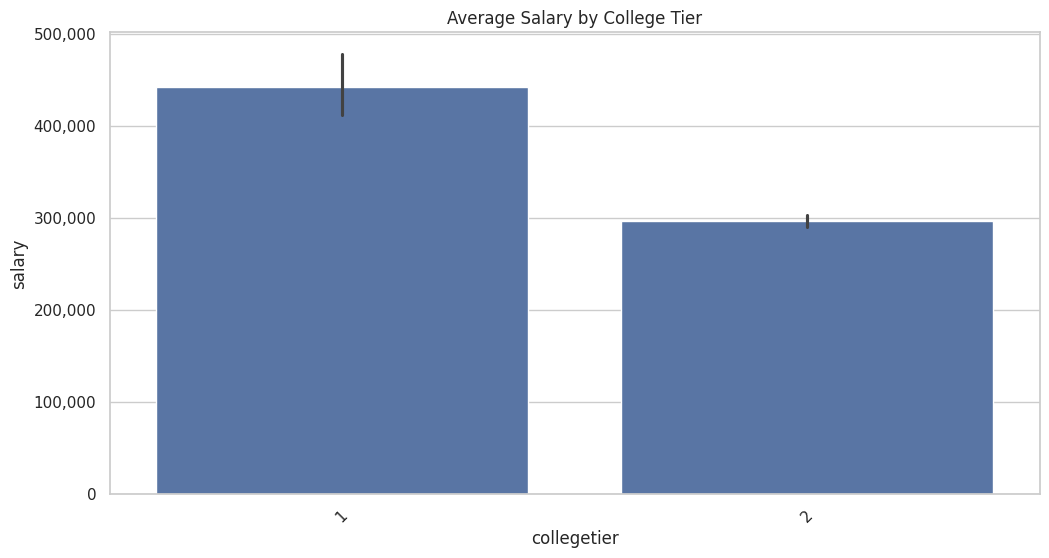

In [82]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='collegetier', y='salary', estimator=np.mean)
plt.title('Average Salary by College Tier')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()

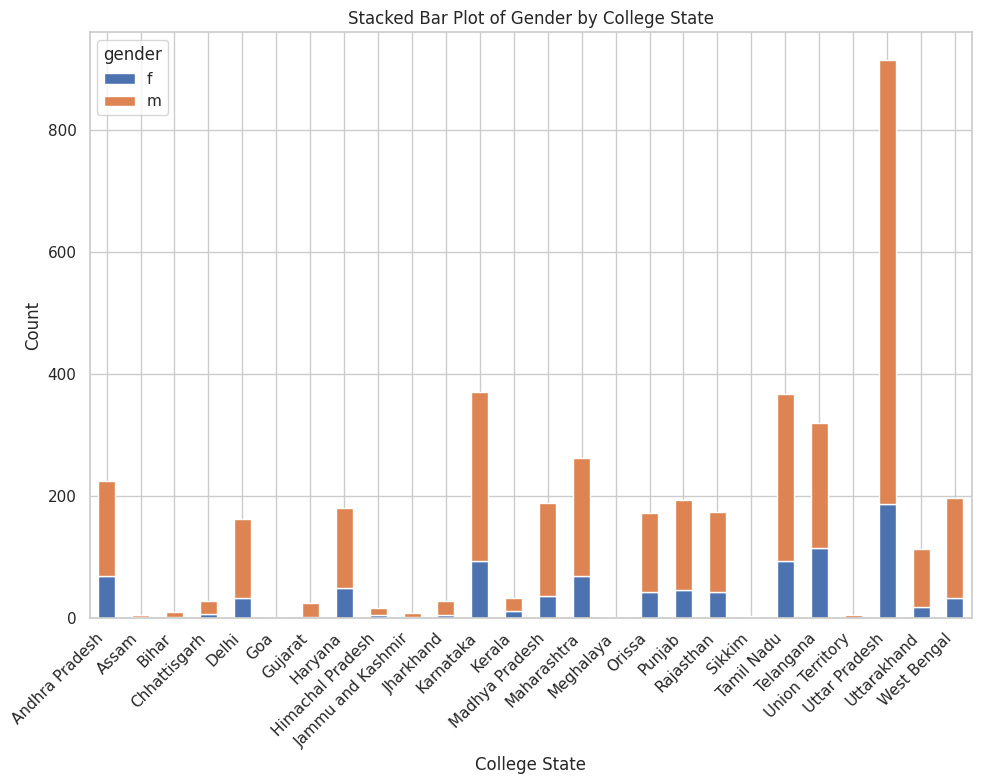

In [83]:
pivot_table = df.pivot_table(index='collegestate', columns='gender',values='salary', aggfunc='count').fillna(0)
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Stacked Bar Plot of Gender by College State')
plt.xlabel('College State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Adjusted alignment to 'right'
plt.tight_layout() # Adjust layout to prevent clipping
plt.show()

In [86]:
import scipy.stats as stats
# Create a contingency table
contingency_table = pd.crosstab(df['gender'], df['specialization'])
 # Display the contingency table
print("Contingency Table:")
print(contingency_table)
 # Perform Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
 # Create a results DataFrame with reset index
results = pd.DataFrame({
  'Metric': ['Chi-Squared Statistic', 'P-value', 'Degrees of Freedom','Conclusion'],
  'Value': [
     chi2_stat,
     p_value,
      dof,
 "Reject the null hypothesis" if p_value < 0.05 else "Fail to reject the null hypothesis"
 ]
 })
 # Reset the index of the results DataFrame
results.reset_index(drop=True, inplace=True)

# Display the results
print("\nChi-Square Test Results:")
print(results)

Contingency Table:
specialization  aeronautical engineering  \
gender                                     
f                                      1   
m                                      2   

specialization  applied electronics and instrumentation  \
gender                                                    
f                                                     2   
m                                                     7   

specialization  automobile/automotive engineering  biomedical engineering  \
gender                                                                      
f                                               0                       2   
m                                               5                       0   

specialization  biotechnology  ceramic engineering  chemical engineering  \
gender                                                                     
f                           9                    0                     1   
m                           6 